# 5.2.2 Transformación de textos a características usando CountVectorizer

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.notebook_repr_html", False)

import warnings
warnings.filterwarnings("ignore")

Permite convertir un array de strigs a una matriz documento-término

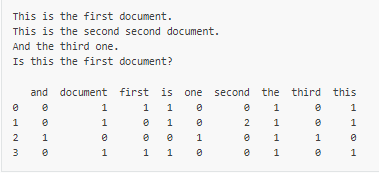

## 5.2.2.1 Creación del corpus

In [ ]:
corpus = [
    "This is the first document.",
    "This is the second second document.",
    "And the third one.",
    "Is this the first document?",
]

## 5.2.2.2 Creación del transformador

In [ ]:
vectorizer = CountVectorizer(
    # -------------------------------------------------------------------------
    # Convert all characters to lowercase before tokenizing.
    lowercase=True,
    # -------------------------------------------------------------------------
    # Override the preprocessing (strip_accents and lowercase) stage
    preprocessor=None,
    # -------------------------------------------------------------------------
    # Override the string tokenization step while preserving the preprocessing
    # and n-grams generation steps. Only applies if analyzer == 'word'.
    tokenizer=None,
    # -------------------------------------------------------------------------
    # If ‘english’, a built-in stop word list for English is used.
    stop_words=None,
    # -------------------------------------------------------------------------
    # {‘ascii’, ‘unicode’}
    # Remove accents and perform other character normalization during the
    # preprocessing step. ‘ascii’ is a fast method that only works on
    # characters that have a direct ASCII mapping. ‘unicode’ is a slightly
    # slower method that works on any characters.
    strip_accents=None,
    # -------------------------------------------------------------------------
    # {‘word’, ‘char’, ‘char_wb’}
    # Whether the feature should be made of word n-gram or character n-grams.
    analyzer="word",
    # -------------------------------------------------------------------------
    # Regular expression denoting what constitutes a “token”, only used if
    # analyzer == 'word'. The default regexp select tokens of 2 or more
    # alphanumeric characters (punctuation is completely ignored and always
    # treated as a token separator).
    token_pattern=r"(?u)\b\w\w+\b",
    # -------------------------------------------------------------------------
    # When building the vocabulary ignore terms that have a document frequency
    # strictly higher than the given threshold (corpus-specific stop words). If
    # float, the parameter represents a proportion of documents, integer
    # absolute counts. This parameter is ignored if vocabulary is not None.
    max_df=1.0,
    # -------------------------------------------------------------------------
    # When building the vocabulary ignore terms that have a document frequency
    # strictly lower than the given threshold. This value is also called
    # cut-off in the literature. If float, the parameter represents a
    # proportion of documents, integer absolute counts.
    min_df=1,
    # -------------------------------------------------------------------------
    # If not None, build a vocabulary that only consider the top max_features
    # ordered by term frequency across the corpus.
    max_features=None,
    # -------------------------------------------------------------------------
    # If True, all non zero counts are set to 1. This is useful for discrete
    # probabilistic models that model binary events rather than integer counts.
    binary=False,
)

## 5.2.2.3 Creación de la matriz documento-termino

In [ ]:
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)

pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out(),
)

## 5.2.2.4 Transformación de un texto nuevo

In [ ]:
vectorizer.transform(["Something completely new."]).toarray()

## 5.2.2.5 Construcción de un analizador

In [ ]:
analyze = vectorizer.build_analyzer()
analyze("This is a completely new text document to analyze.")

## 5.2.2.6 Posición (columna) del token en la matriz

In [ ]:
vectorizer.vocabulary_.get("document")

## 5.2.2.7 Reconocimiento de bigramas

In [ ]:
bigram_vectorizer = CountVectorizer(
    ngram_range=(1, 2),
    token_pattern=r"\b\w+\b",
    min_df=1,
)

analyze = bigram_vectorizer.build_analyzer()

analyze("Bi-grams are cool!")

In [ ]:
bigram_vectorizer.fit(corpus)

X_2 = bigram_vectorizer.transform(corpus)

pd.DataFrame(
    X_2.toarray(),
    columns=bigram_vectorizer.get_feature_names_out(),
)

## 5.2.2.8 Extracción de una columna de la matriz documento-término

In [ ]:
feature_index = bigram_vectorizer.vocabulary_.get("is this")

X_2[:, feature_index].toarray()

In [ ]:
print('ok_')